In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as inline
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gizo
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | uusikaupunki
Processing Record 5 of Set 1 | dawlatabad
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | vallenar
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | kande
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | changli
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | mbeya
Processing Record 23 of

Processing Record 36 of Set 4 | safford
Processing Record 37 of Set 4 | kunda
Processing Record 38 of Set 4 | troitsko-pechorsk
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | kutum
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | resistencia
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | gawler
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | wilmington island
Processing Record 3 of Set 5 | dhuburi
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | baghdad
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | mitake
Processing

Processing Record 26 of Set 8 | barawe
City not found. Skipping...
Processing Record 27 of Set 8 | nowa ruda
Processing Record 28 of Set 8 | porto novo
Processing Record 29 of Set 8 | kawambwa
Processing Record 30 of Set 8 | posse
Processing Record 31 of Set 8 | svetlogorsk
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | bonavista
Processing Record 34 of Set 8 | paris
Processing Record 35 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 36 of Set 8 | norman wells
Processing Record 37 of Set 8 | chipinge
Processing Record 38 of Set 8 | lodja
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | qaanaaq
Processing Record 41 of Set 8 | tiksi
Processing Record 42 of Set 8 | marsa matruh
Processing Record 43 of Set 8 | chernyshevskiy
Processing Record 44 of Set 8 | caconda
Processing Record 45 of Set 8 | lasa
Processing Record 46 of Set 8 | tadine
Processing Record 47 of Set 8 | sento se
City not found. Skipping...
Processing Rec

Processing Record 16 of Set 12 | chandbali
Processing Record 17 of Set 12 | monrovia
Processing Record 18 of Set 12 | cururupu
Processing Record 19 of Set 12 | alyangula
Processing Record 20 of Set 12 | barkhan
Processing Record 21 of Set 12 | hihifo
City not found. Skipping...
Processing Record 22 of Set 12 | anapskaya
Processing Record 23 of Set 12 | caravelas
Processing Record 24 of Set 12 | qasigiannguit
Processing Record 25 of Set 12 | abu dhabi
Processing Record 26 of Set 12 | acapulco
Processing Record 27 of Set 12 | wanning
Processing Record 28 of Set 12 | bulolo
Processing Record 29 of Set 12 | hirara
Processing Record 30 of Set 12 | changji
Processing Record 31 of Set 12 | rincon
Processing Record 32 of Set 12 | terekli-mekteb
Processing Record 33 of Set 12 | siirt
Processing Record 34 of Set 12 | viedma
Processing Record 35 of Set 12 | portobelo
Processing Record 36 of Set 12 | teguldet
Processing Record 37 of Set 12 | ciuruleasa
Processing Record 38 of Set 12 | ambodifototr

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gizo,-8.10,156.84,82.22,78,100,12.88,SB,2020-07-10 15:57:30
1,Bethel,41.37,-73.41,80.01,94,90,9.17,US,2020-07-10 15:55:44
2,Uusikaupunki,60.80,21.41,64.40,52,75,4.70,FI,2020-07-10 15:57:31
3,Dawlatabad,36.41,64.91,88.25,15,0,6.22,AF,2020-07-10 15:57:31
4,Hobyo,5.35,48.53,78.75,78,71,26.98,SO,2020-07-10 15:57:31
5,Mataura,-46.19,168.86,40.78,93,98,3.13,NZ,2020-07-10 15:57:31
6,Vallenar,-28.57,-70.76,72.70,21,0,4.34,CL,2020-07-10 15:57:31
7,Mar Del Plata,-38.00,-57.56,48.99,93,90,14.99,AR,2020-07-10 15:57:31
8,Jamestown,42.10,-79.24,80.60,65,1,10.29,US,2020-07-10 15:57:32
9,Vaini,-21.20,-175.20,69.80,88,40,10.29,TO,2020-07-10 15:57:32


In [9]:
# Reorder columns.
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                 "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gizo,SB,2020-07-10 15:57:30,-8.10,156.84,82.22,78,100,12.88
1,Bethel,US,2020-07-10 15:55:44,41.37,-73.41,80.01,94,90,9.17
2,Uusikaupunki,FI,2020-07-10 15:57:31,60.80,21.41,64.40,52,75,4.70
3,Dawlatabad,AF,2020-07-10 15:57:31,36.41,64.91,88.25,15,0,6.22
4,Hobyo,SO,2020-07-10 15:57:31,5.35,48.53,78.75,78,71,26.98
5,Mataura,NZ,2020-07-10 15:57:31,-46.19,168.86,40.78,93,98,3.13
6,Vallenar,CL,2020-07-10 15:57:31,-28.57,-70.76,72.70,21,0,4.34
7,Mar Del Plata,AR,2020-07-10 15:57:31,-38.00,-57.56,48.99,93,90,14.99
8,Jamestown,US,2020-07-10 15:57:32,42.10,-79.24,80.60,65,1,10.29
9,Vaini,TO,2020-07-10 15:57:32,-21.20,-175.20,69.80,88,40,10.29


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
import time

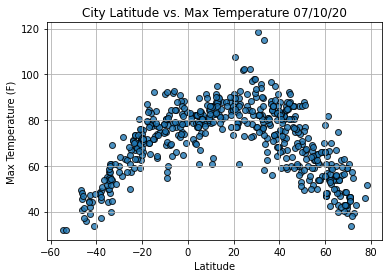

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

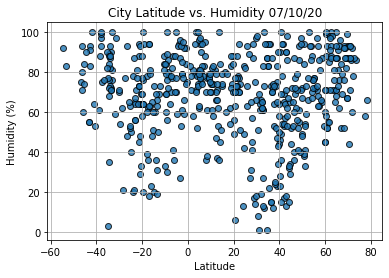

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

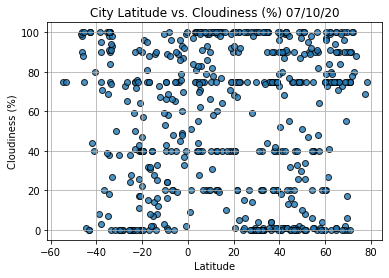

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

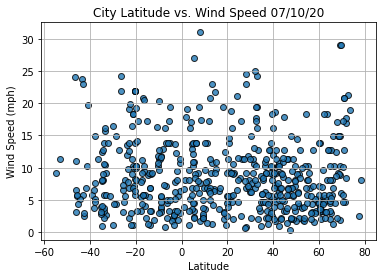

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Create the hemisphere dataframes.
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2020-07-10 15:53:35
Lat                        -53.15
Lng                        -70.92
Max Temp                       32
Humidity                       83
Cloudiness                     75
Wind Speed                  11.41
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
547     True
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bethel,US,2020-07-10 15:55:44,41.37,-73.41,80.01,94,90,9.17
2,Uusikaupunki,FI,2020-07-10 15:57:31,60.80,21.41,64.40,52,75,4.70
3,Dawlatabad,AF,2020-07-10 15:57:31,36.41,64.91,88.25,15,0,6.22
4,Hobyo,SO,2020-07-10 15:57:31,5.35,48.53,78.75,78,71,26.98
8,Jamestown,US,2020-07-10 15:57:32,42.10,-79.24,80.60,65,1,10.29


In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

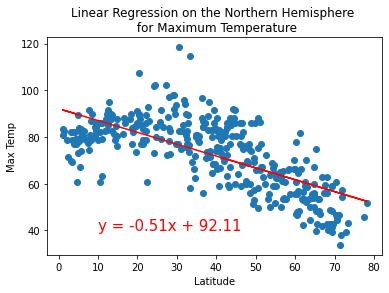

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

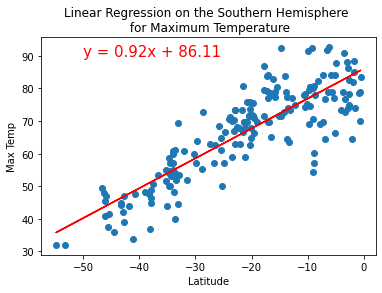

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

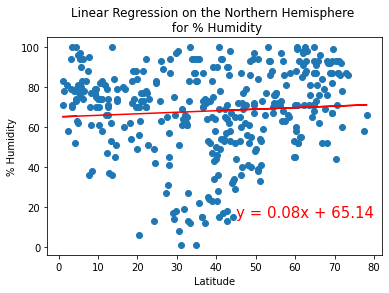

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

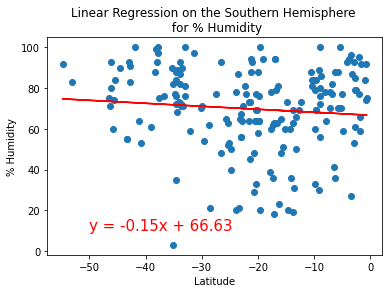

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

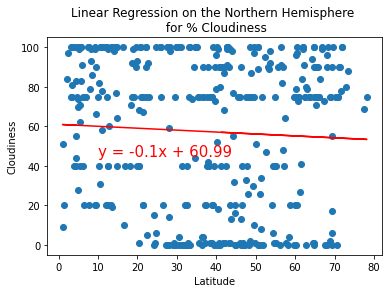

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(10,45))

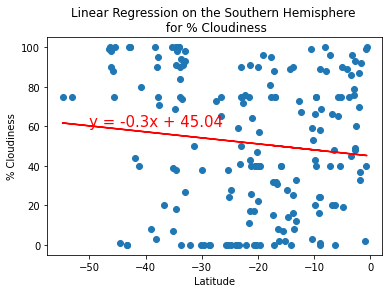

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

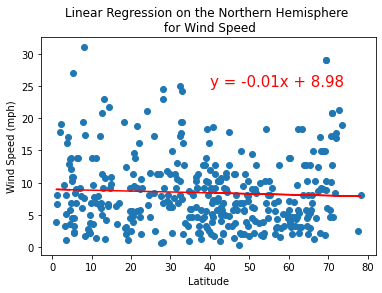

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,25))

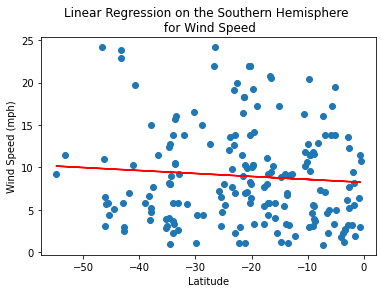

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,27.5))